# **Nama : Mambaur Roziq Alwi**
# Email : alwiroziq1998@gmail.com
Submission Dicoding - Belajar machine learning untuk pemula

In [2]:
# Import library
import pandas as pd
import numpy as np
import zipfile,os
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# Get dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

# Ekstract zip file
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



--2021-06-21 12:49:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.57MB/s    in 4m 54s  

2021-06-21 12:54:41 (1.05 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [10]:
# Augmentation
base_dir = "/tmp/rockpaperscissors/rps-cv-images/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4)

# Training
train_generator = training_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode='categorical',
    subset='training')

# Validate
validation_generator = training_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode='categorical',
    subset='validation')


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [11]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    # optimizer='SGD',
    metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [12]:
# Callback for prevent overfitting
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True)


# Fit model
history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks = [callbacks]
    )


Epoch 1/20
41/41 - 81s - loss: 0.9339 - accuracy: 0.5367 - val_loss: 0.5314 - val_accuracy: 0.8113

Epoch 00001: val_loss improved from inf to 0.53141, saving model to model.h5
Epoch 2/20
41/41 - 80s - loss: 0.3917 - accuracy: 0.8612 - val_loss: 0.2629 - val_accuracy: 0.9144

Epoch 00002: val_loss improved from 0.53141 to 0.26294, saving model to model.h5
Epoch 3/20
41/41 - 80s - loss: 0.2734 - accuracy: 0.9002 - val_loss: 0.2276 - val_accuracy: 0.9097

Epoch 00003: val_loss improved from 0.26294 to 0.22762, saving model to model.h5
Epoch 4/20
41/41 - 80s - loss: 0.2451 - accuracy: 0.9056 - val_loss: 0.2073 - val_accuracy: 0.9306

Epoch 00004: val_loss improved from 0.22762 to 0.20729, saving model to model.h5
Epoch 5/20
41/41 - 80s - loss: 0.1953 - accuracy: 0.9298 - val_loss: 0.1559 - val_accuracy: 0.9583

Epoch 00005: val_loss improved from 0.20729 to 0.15594, saving model to model.h5
Epoch 6/20
41/41 - 80s - loss: 0.1360 - accuracy: 0.9509 - val_loss: 0.0929 - val_accuracy: 0.9711


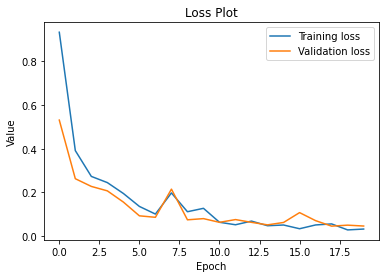

In [13]:
# Train and validation lost
plt.plot(history.history['loss'], label ='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

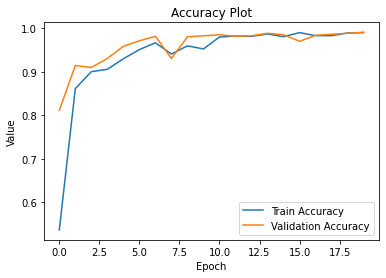

In [14]:
# Train and validation accuration
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
[[0. 1. 0.]]
This is ROCK


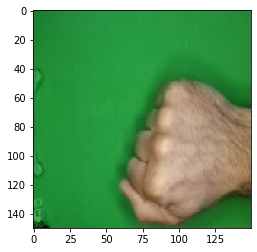

In [20]:
# Predict Images
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes[0][0]==1:
    print('This is PAPER')
  elif classes[0][1]==1:
    print('This is ROCK')
  else:
    print('This is SCISSORS')